In [2]:
# The analysis presented below is for Kiva Crowdfunding

# Goal

# Kiva.org is an online crowdfunding platform to extend financial services 
# to poor and financially excluded people around the world. Kiva lenders have 
# provided over $1 billion dollars in loans to over 2 million people. In order 
# to set investment priorities, help inform lenders, and understand their target 
# communities, knowing the level of poverty of each borrower is critical. However, 
# this requires inference based on a limited set of information for each borrower.

# In this problem we are trying to estimate the level of poverty of every borrower 
# to help lenders and undertand their target communities

# Datasets

# There are 4 datasets involved in this analysis
# Kiva_loans - loan dataset from Kiva
# Kiva_mpi_region_locations - The mpi of the regions along with geo-locations
# Loan_theme_ids - The themes of the loans
# Loan_themes_by_region - Region-wise loan themes

In [3]:
# Importing libraries

import pandas as pd
import numpy as np

In [4]:
# Reading in the datasets

loans = pd.read_csv("kiva_loans.csv")
mpi = pd.read_csv("kiva_mpi_region_locations.csv")
theme = pd.read_csv("loan_theme_ids.csv")
theme_region = pd.read_csv("loan_themes_by_region.csv")

In [5]:
loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [6]:
mpi.head(5)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [7]:
theme.head(5)

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [8]:
theme_region.head(5)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [9]:
# Pre-processing tables and data quality check

# Loans

print(loans.shape)

# number of rows

print(len(loans))

# NAs

loans.isnull().sum()

# % of NAs

(loans.isnull().sum()/len(loans))*100

# Variables tags, region, funded time and partner id have the most missing values

# Removing tags and funded time as they are not important

loans2 = loans.drop(columns = ['tags', 'funded_time'])

(loans2.isnull().sum()/len(loans2))*100

# Now removing rows with missing values

loans3 = loans2.dropna()

loans3.shape

(671205, 20)
671205


(614392, 18)

In [10]:
# Data pre-processing for formats and currencies

# Selecting the relavant columns

loans4 = loans3[['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'country_code', 'country', 'region', \
                 'partner_id', 'disbursed_time', \
                 'term_in_months','lender_count','borrower_genders', 'repayment_interval']]
loans4.shape

# Changing data formats

loans5= loans4

loans5.is_copy = False

loans5.disbursed_time = loans5.disbursed_time.str[:4]

loans5.disbursed_time.head(5)

loans5.disbursed_time.astype(int).head(5)

0    2013
1    2013
2    2013
3    2013
4    2013
Name: disbursed_time, dtype: int32

In [11]:
# Exploratory Data Analysis on loans dataset

import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt

loans5.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.143920e+05,614392.000000,614392.000000,614392.000000,614392.000000,614392.000000
mean,9.956915e+05,749.568639,791.377777,180.271896,13.742322,19.780144
std,1.976545e+05,1035.902585,1070.949530,94.964614,8.645786,27.174887
min,6.530470e+05,0.000000,25.000000,9.000000,2.000000,0.000000
25%,8.253288e+05,250.000000,275.000000,127.000000,8.000000,7.000000
50%,9.937555e+05,450.000000,475.000000,145.000000,13.000000,12.000000
75%,1.170035e+06,875.000000,950.000000,204.000000,14.000000,24.000000
max,1.340333e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [12]:
loans5.describe(include = 'all')

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,partner_id,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval
count,6.143920e+05,614392.000000,614392.000000,614392,614392,614392,614392,614392,614392.000000,614392,614392.000000,614392.000000,614392,614392
unique,NaN,NaN,NaN,163,15,81,81,12691,NaN,5,NaN,NaN,9574,3
top,NaN,NaN,NaN,Farming,Agriculture,PH,Philippines,Kaduna,NaN,2016,NaN,NaN,female,monthly
freq,NaN,NaN,NaN,70117,169441,160360,160360,10000,NaN,187533,NaN,NaN,394364,307120
mean,9.956915e+05,749.568639,791.377777,NaN,NaN,NaN,NaN,NaN,180.271896,NaN,13.742322,19.780144,NaN,NaN
std,1.976545e+05,1035.902585,1070.949530,NaN,NaN,NaN,NaN,NaN,94.964614,NaN,8.645786,27.174887,NaN,NaN
min,6.530470e+05,0.000000,25.000000,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,2.000000,0.000000,NaN,NaN
25%,8.253288e+05,250.000000,275.000000,NaN,NaN,NaN,NaN,NaN,127.000000,NaN,8.000000,7.000000,NaN,NaN
50%,9.937555e+05,450.000000,475.000000,NaN,NaN,NaN,NaN,NaN,145.000000,NaN,13.000000,12.000000,NaN,NaN
75%,1.170035e+06,875.000000,950.000000,NaN,NaN,NaN,NaN,NaN,204.000000,NaN,14.000000,24.000000,NaN,NaN


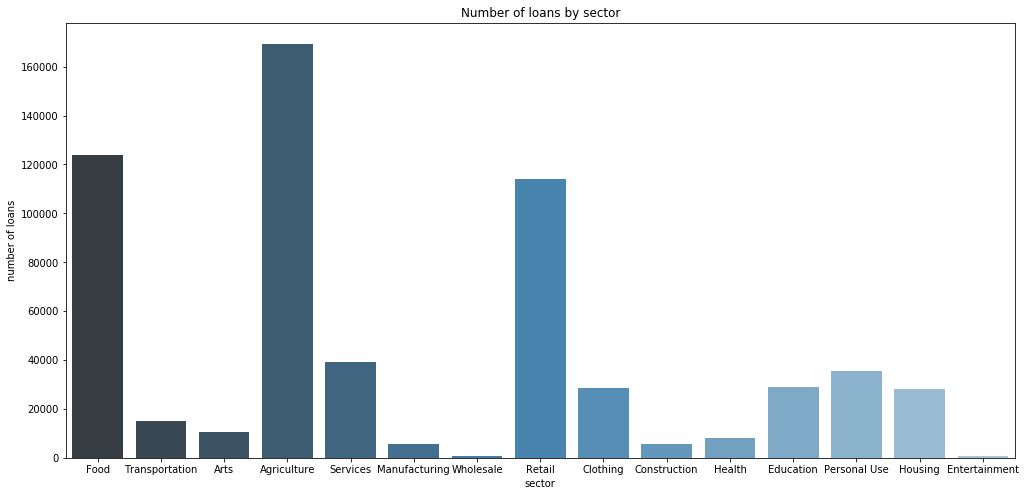

In [13]:
# Basic graphs using seaborn

# Number of loans by sector

plt.figure(figsize=(17,8))

sb.countplot(x="sector", data=loans5, palette="Blues_d");
plt.title('Number of loans by sector')
plt.xlabel('sector')
plt.ylabel('number of loans')


plt.show()

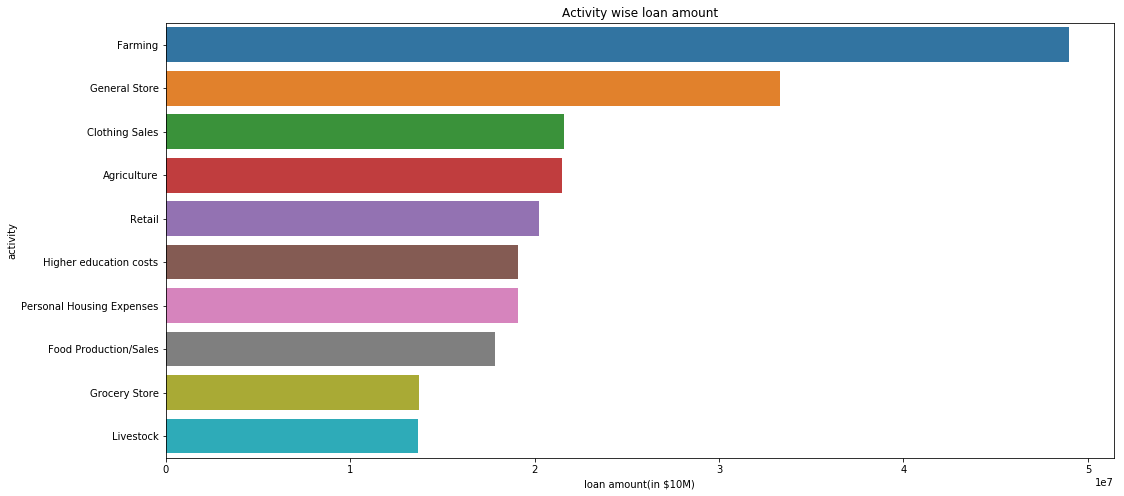

In [14]:
# Loan amount given by activity

plt.figure(figsize=(17,8))

activity_wise = loans5.groupby(by=['activity'])[loans5.columns[2]].sum().sort_values(ascending = False).head(10)
sb.barplot(activity_wise.values, activity_wise.index, )
plt.xlabel('loan amount(in $10M)')
plt.title('Activity wise loan amount')

plt.show()

In [15]:
# Pre-processing MPI dataset

# Loans

print(mpi.shape)

# number of rows

print(len(mpi))

# NAs

mpi.isnull().sum()

# % of NAs

(mpi.isnull().sum()/len(mpi))*100

# It is a wrong representation of the data which has few inapproriate rows which have to be removeds

# Now removing rows with missing values

mpi2 = mpi.dropna()

mpi2.shape

mpi2.head(10)

(2772, 9)
2772


,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
5,"Daykundi, Afghanistan",AFG,Afghanistan,Daykundi,South Asia,0.313,"(33.669495, 66.0463534)",33.669495,66.046353
6,"Farah, Afghanistan",AFG,Afghanistan,Farah,South Asia,0.319,"(32.4464635, 62.1454133)",32.446464,62.145413
7,"Faryab, Afghanistan",AFG,Afghanistan,Faryab,South Asia,0.250,"(36.0795613, 64.90595499999999)",36.079561,64.905955
8,"Ghazni, Afghanistan",AFG,Afghanistan,Ghazni,South Asia,0.245,"(33.5450587, 68.4173972)",33.545059,68.417397
9,"Ghor, Afghanistan",AFG,Afghanistan,Ghor,South Asia,0.384,"(34.0995776, 64.90595499999999)",34.099578,64.905955


In [16]:
# Some more pre-processing

# Data type checking for map

print(mpi2["MPI"].dtype)
print(mpi2["lat"].dtype)
print(mpi2["lon"].dtype)

float64
float64
float64


In [17]:
# plotting for mpi dataset

import folium as folium

In [18]:
plt.figure(figsize=(17,8))

def plot_mpi_by_region(col_val):
    # generate a new map
    folium_map = folium.Map(zoom_start=12,
                        tiles="CartoDB dark_matter",
                        width='50%')

    # for each row in the data, add a cicle marker
    for index, row in mpi2.iterrows():

        # generate the popup message that is shown on click.
        popup_text = "World Region:  {}<br> MPI: {}"
        popup_text = popup_text.format(row["world_region"],
                          row["MPI"])

        # generate the popup message that is shown on click.
    #     popup_text = "world_region:  {}<br> country: {}<br> region: {}<br> MPI: {}"
    #     popup_text = popup_text.format(row["world_region"],
    #                       row["country"],
    #                       row["region"],
    #                       row["MPI"])

        # radius of circles
        radius = row["MPI"]*2

        # choose the color of the marker
        if row[col_val]>0.5:
            # color="#FFCE00" # orange
            # color="#007849" # green
            color="#EF0225" # red
        elif row[col_val]<0.5 and row[col_val]>0.25:
            # color="#0375B4" # blue
            # color="#FFCE00" # yellow            
            color="#FCEf00" # yellow
        else:
            color = "#1BED04" # green
            

        # add marker to the map
        folium.CircleMarker(location=(row["lat"],
                                      row["lon"]),
                            radius=radius,
                            color=color,
                            popup = popup_text,
                            fill=True).add_to(folium_map)

    return folium_map

# In the parameter area, enter the column you wish to base your size of marker upon
try:
    mpi_map = plot_mpi_by_region("MPI")
except TypeError:
    print('please enter a numeric field to get the marker')
    
mpi_map

In [19]:
# Pre-processing third database

# Themes

print(theme.shape)

# number of rows

print(len(theme))

# NAs

theme.isnull().sum()

# Dropping rows with blank themes

theme2 = theme.dropna()

theme2.shape

(779092, 4)
779092


(764279, 4)

In [20]:
# Pre-processing fourth database

# Themes region

print(theme_region.shape)

# number of rows

print(len(theme_region))

# NAs

theme_region.isnull().sum()

# % of NAs

(theme_region.isnull().sum()/len(theme_region))*100

# It is a wrong representation of the data which has few inapproriate rows which have to be removeds

# Removing geocode_old, geocode, names, lat, lon and mpi_geo

theme_region2 = theme_region.drop(columns = ['geocode_old', 'geocode', 'names', 'lat', 'lon', 'mpi_geo'])

(theme_region2.isnull().sum()/len(theme_region2))*100

# Now removing rows with missing values

theme_region3 = theme_region2.dropna()

theme_region3.shape

theme_region3.head(10)

(15736, 21)
15736


,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,ISO,number,amount,LocationName,geo,mpi_region,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,KHM,1,450,"Banteay Meanchey, Cambodia","(13.6672596, 102.8975098)","Banteay Mean Chey, Cambodia",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,KHM,58,20275,"Battambang Province, Cambodia","(13.0286971, 102.989615)","Banteay Mean Chey, Cambodia",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,KHM,7,9150,"Battambang Province, Cambodia","(13.0286971, 102.989615)","Banteay Mean Chey, Cambodia",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,KHM,1383,604950,"Kampong Cham Province, Cambodia","(12.0982918, 105.3131185)","Kampong Cham, Cambodia",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,KHM,3,275,"Kampong Cham Province, Cambodia","(12.0982918, 105.3131185)","Kampong Cham, Cambodia",90.0
5,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Kampong Cham Province,KHM,36,62225,"Kampong Cham Province, Cambodia","(12.0982918, 105.3131185)","Kampong Cham, Cambodia",90.0
6,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000007VvXr,Solar Home Systems,Cambodia,No,Kampong Cham Province,KHM,2,1300,"Kampong Cham Province, Cambodia","(12.0982918, 105.3131185)","Kampong Cham, Cambodia",90.0
7,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000weyk,General,Cambodia,No,Kampong Chhnang Province,KHM,249,237175,"Kampong Chhnang Province, Cambodia","(12.1392352, 104.5655273)","Kampong Chhnang, Cambodia",90.0
8,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000007VvXr,Solar Home Systems,Cambodia,No,Kampong Chhnang Province,KHM,7,3050,"Kampong Chhnang Province, Cambodia","(12.1392352, 104.5655273)","Kampong Chhnang, Cambodia",90.0
9,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Kampong Chhnang Province,KHM,18,31425,"Kampong Chhnang Province, Cambodia","(12.1392352, 104.5655273)","Kampong Chhnang, Cambodia",90.0


<Figure size 1224x576 with 0 Axes>

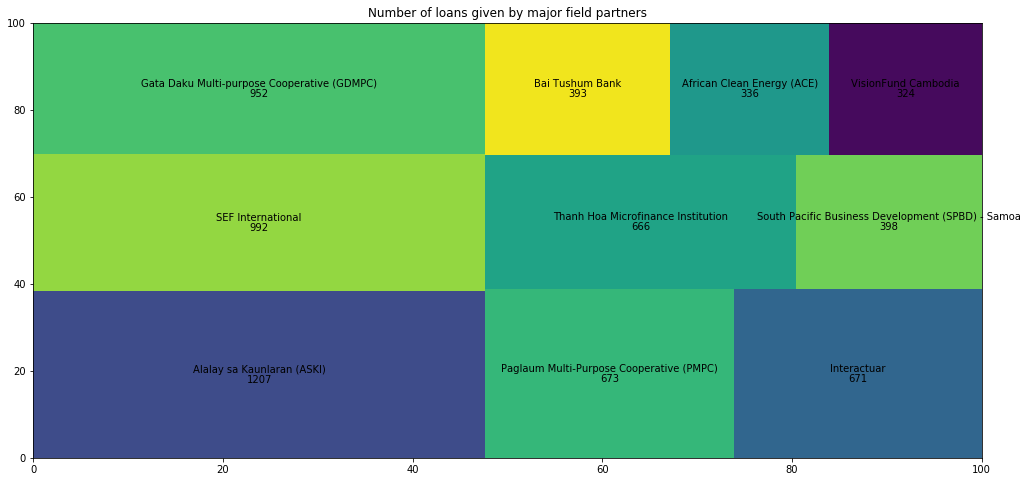

In [21]:
# EDA on loans theme dataset

# Major lenders

# Basic graphs using seaborn

# Number of loans by sector

import squarify as squarify

plt.figure(figsize=(17,8))

# field_partner = theme_region3.groupby(by=['Field Partner Name'])[theme_region3.columns[1]].count().\
#                 sort_values(ascending = False).head(10)
# sb.barplot(field_partner.values, field_partner.index, orient = "h", color = "brown")
# plt.xlabel('Number of loans given')
# plt.title('Major lenders')

# plt.show()


field_partner = theme_region3['Field Partner Name'].value_counts().sort_values(ascending = False).head(10)
squarify.plot(sizes=field_partner.values,label=field_partner.index, value=field_partner.values)
plt.title('Number of loans given by major field partners')

plt.show()

c:\users\prerit\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


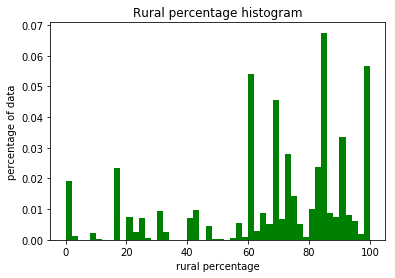

In [22]:
# sb.distplot(theme_region3['rural_pct'], kde = False, rug = True)

plt.hist(theme_region3['rural_pct'], 50, normed = 1, facecolor = 'green')
plt.xlabel("rural percentage")
plt.ylabel("percentage of data")
plt.title("Rural percentage histogram")

plt.show()

# This shows that most of the loans are offered to people living in regions with high rural population

In [23]:
#### Predictive Analytics

# Good funding in future largely depends on good repayment of loans. A lender whose who knows how his loan will be repayed
# is in a better position to secure funding for future

# Here we will try to predict what will be the repayment pattern of a loan
# We will do this using random forest

# Subsetting the dataset for random forest

loans6 = loans5[['loan_amount', 'disbursed_time','term_in_months', 'lender_count', 'repayment_interval']]

loans6.repayment_interval.astype('category')

loans6.head(5)

,loan_amount,disbursed_time,term_in_months,lender_count,repayment_interval
0,300.0,2013,12.0,12,irregular
1,575.0,2013,11.0,14,irregular
2,150.0,2013,43.0,6,bullet
3,200.0,2013,11.0,8,irregular
4,400.0,2013,14.0,16,monthly


In [24]:
loans6.describe()

,loan_amount,term_in_months,lender_count
count,614392.000000,614392.000000,614392.000000
mean,791.377777,13.742322,19.780144
std,1070.949530,8.645786,27.174887
min,25.000000,2.000000,0.000000
25%,275.000000,8.000000,7.000000
50%,475.000000,13.000000,12.000000
75%,950.000000,14.000000,24.000000
max,100000.000000,158.000000,2986.000000


In [25]:
# Splitting the data into test and training

loans6['is_train'] = np.random.uniform(0, 1, len(loans6)) <= .75

train, test = loans6[loans6['is_train']==True], loans6[loans6['is_train']==False]

# number of observations in train and test
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 460421
Number of observations in the test data: 153971


c:\users\prerit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# List of predictor variables

# Traget valiable is repayment interval
features = loans6.columns[:4]

# View features
features

Index(['loan_amount', 'disbursed_time', 'term_in_months', 'lender_count'], dtype='object')

In [27]:
# One-hot encoding of target variable

y = pd.factorize(train['repayment_interval'])[0]

# View target
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
# Importing libraries

from sklearn.ensemble import RandomForestClassifier

# Initializing a random forest model

model_rf = RandomForestClassifier(n_jobs=2, random_state=0)

In [29]:
# Training the model on train set

model_rf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
# Applying to test dataset

model_rf.predict(test[features])

array([2, 0, 2, ..., 2, 2, 1], dtype=int64)

In [31]:
# top 10 obs

model_rf.predict_proba(test[features])[0:10]

array([[ 0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.43205128,  0.52820513,  0.03974359],
       [ 0.6       ,  0.3       ,  0.1       ],
       [ 0.06706349,  0.93293651,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.11212121,  0.88787879,  0.        ],
       [ 0.69585784,  0.21909314,  0.08504902],
       [ 0.53333333,  0.46666667,  0.        ]])

In [32]:
# Converting back to original forms of repayment intervals

preds = loans6.repayment_interval[model_rf.predict(test[features])]

preds.head(5)

2       bullet
0    irregular
2       bullet
1    irregular
0    irregular
Name: repayment_interval, dtype: object

In [33]:
# View a list of the features and their importance scores
list(zip(train[features], model_rf.feature_importances_))

[('loan_amount', 0.25631056484739717),
 ('disbursed_time', 0.060917025946392887),
 ('term_in_months', 0.46793052262454388),
 ('lender_count', 0.21484188658166606)]

In [34]:
# Merging loans5 and theme2

combined  = loans5.join(theme2, on = 'id', how = 'left', rsuffix = '2')

combined.head(5)

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,partner_id,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval,id2,Loan Theme ID,Loan Theme Type,Partner ID
0,653051,300.0,300.0,Fruits & Vegetables,Food,PK,Pakistan,Lahore,247.0,2013,12.0,12,female,irregular,1314760.0,a1050000000wbat,Subsistence Agriculture,199.0
1,653053,575.0,575.0,Rickshaw,Transportation,PK,Pakistan,Lahore,247.0,2013,11.0,14,"female, female",irregular,1314762.0,a1050000000wf1G,General,176.0
2,653068,150.0,150.0,Transportation,Transportation,IN,India,Maynaguri,334.0,2013,43.0,6,female,bullet,1314778.0,a1050000000wf1G,General,176.0
3,653063,200.0,200.0,Embroidery,Arts,PK,Pakistan,Lahore,247.0,2013,11.0,8,female,irregular,1314772.0,a1050000002VOaC,Vulnerable Populations,188.0
4,653084,400.0,400.0,Milk Sales,Food,PK,Pakistan,Abdul Hakeem,245.0,2013,14.0,16,female,monthly,1314796.0,a1050000000wf0q,General,145.0


In [35]:
# writing out the combined dataset to an output csv file for further analysis

combined.to_csv('combined_dataset.csv', sep = ',')